# Impact Functions

#### What is an impact function?

An impact function relates the percentage of damage in the exposurethe to the hazard intensity, also commonly referred to as a "vulnerability curves" in the modelling community. Every hazard and exposure types are characterized by an impact function.

#### What is the difference between `ImpactFunc` and `ImpactFuncSet`?

An `ImpactFunc` is a class for a single impact function. E.g. a function that relates the percentage of damage of a reinforced concrete building (exposure) to the wind speed of a tropical cyclone (hazard intensity). 

An `ImpactFuncSet` class is a container that contains multiple `ImpactFunc`. For instance, there are 100 `ImpactFunc` represent 100 types of buildings exposed to tropical cyclone's wind damage. These 100 `ImpactFunc` are all gathered in an `ImpactFuncSet`.

#### What does an `ImpactFunc` look like in CLIMADA?

The `ImpacrFunc` class requires users to define the following attributes.

| **Mandatory attributes** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| Data Type &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| Description &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|
| :- | :- | :- |
| haz_type |(str)| Hazard type acronym (e.g. 'TC')|
| id |(int or str)| Unique id of the impact function. Exposures of the same type will refer to the same impact function id|
| name |(str)| Name of the impact function |
| intensity |(np.array)| Intensity values|
| intensity_unit |(str)| Unit of the intensity|
| mdd |(np.array)| Mean damage (impact) degree for each intensity (numbers in [0,1])|
| paa | (np.array)| Percentage of affected assets (exposures) for each intensity (numbers in [0,1])|

Users may use `ImpactFunc.check()` to check that the attributes have been set correctly. The mean damage ratio `mdr` (mdr=mdd*paa) is calculated by the method `ImpactFunc.calc_mdr()`.


#### What does an `ImpactFuncSet` look like in CLIMADA?

The `ImpactFuncSet` class contains all the `ImpactFunc` classes. Users are not required to define any attributes in `ImpactFuncSet`. 

To add an `ImpactFunc` into an `ImpactFuncSet`, simply use the method `ImpactFuncSet.append(ImpactFunc)`. If the users only has one impact function, they should generate an `ImpactFuncSet` that contains one impact function. `ImpactFuncSet` is to be used in the [impact calculation](climada_engine_Impact.ipynb).

`Tag` stores information about the data. E.g. the original file name of the impact functions and descriptions.

| **Attributes** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| Data Type &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| Description &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|
| :- | :- | :- |
| tag |`Tag`| Information about the source data|
| _data | (dict) | Contains `ImpactFunc` classes. Not suppossed to be directly accessed. Use the class methods instead.|

#### Structure of the tutorial

[**Part 1:**](#Part1) Defining `ImpactFunc` from your own data

[**Part 2:**](#Part2) Loading `ImpactFunc` from CLIMADA in-built impact functions

[**Part 3:**](#Part3) Add `ImpactFunc` into the container `ImpactFuncSet`

[**Part 4:**](#Part4) Read and write `ImpactFuncSet` into Excel sheets

[**Part 5:**](#Part5) Loading `ImpactFuncSet` from CLIMADA in-built impact functions

<a id='Part1'></a>
## Part 1: Defining `ImpactFunc` from your own data

The essential attributes are listed in the table above. The following example shows you how to define an `ImpactFunc` from scratch, and using the method `ImpactFunc.calc_mdr()` to calculate the mean damage ratio.

#### Generate a dummy impact function from scratch.

Here we generate an impact function with random dummy data for illustrative reasons. Assuming this impact function is a function that relates building damage to tropical cyclone (TC) wind, with an arbitrary id 3.

In [1]:
import numpy as np
from climada.entity import ImpactFunc

# We initialise a dummy ImpactFunc for tropical cyclone wind damage to building.
# Giving the ImpactFunc an arbitrary id 3.
imp_fun = ImpactFunc() 
imp_fun.haz_type = 'TC'
imp_fun.id = 3
imp_fun.name = 'TC building damage'
# provide unit of the hazard intensity
imp_fun.intensity_unit = 'm/s'
# provide values for the hazard intensity, mdd, and paa
imp_fun.intensity = np.linspace(0, 100, num=15)
imp_fun.mdd = np.concatenate((np.array([0]),np.sort(np.random.rand(14))), axis=0)
imp_fun.paa = np.concatenate((np.array([0]),np.sort(np.random.rand(14))), axis=0)
# check if the all the attributes are set correctly
imp_fun.check()

In [2]:
# Calculate the mdr at hazard intensity 18.7 m/s
print('Mean damage ratio at intensity 18.7 m/s: ', imp_fun.calc_mdr(18.7))

Mean damage ratio at intensity 18.7 m/s:  0.06631877847780823


#### Visualise the Impact function

The method `plot()` uses the [matplotlib's axes plot function](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.axes.Axes.plot.html) to visualise the impact function. It returns a figure and axes, which can be modified by users.

<AxesSubplot:title={'center':'TC 3: TC building damage'}, xlabel='Intensity (m/s)', ylabel='Impact (%)'>

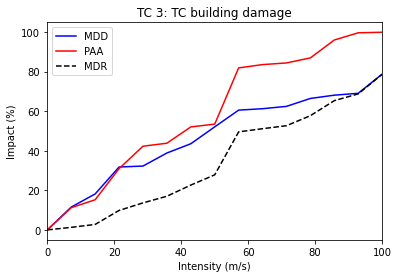

In [3]:
# plot impact function
imp_fun.plot()

<a id='Part2'></a>
## Part 2: Loading impact functions from CLIMADA in-built impact functions

In CLIMADA there is several defined impact functions that users can directly load and use them. However, users should be aware of the applications of the impact functions to types of assets, reading the background references of the impact functions are strongly recommended.<br>
Currently available perils include [tropical cyclones](../../climada/entity/impact_funcs/trop_cyclone.py), [river floods](../../climada/entity/impact_funcs/river_flood.py), [European windstorm](../../climada/entity/impact_funcs/storm_europe.py), [crop yield](../../climada/entity/impact_funcs/relative_cropyield.py), and [drought](../../climada/entity/impact_funcs/drought.py). Continuous updates of perils are available.<br>
Here we use the impact function of tropical cyclones as an example.


#### Loading CLIMADA in-built impact function for tropical cyclones

`ImpfTropCyclone` is a derivated class of `ImpactFunc`. This in-built impact function estimates the insured property damages by tropical cyclone wind in USA, forllowing the reference paper [Emanuel (2011)](https://doi.org/10.1175/WCAS-D-11-00007.1). <br>

To generate the this impact function, method `set_emanual_usa()` is used.

<AxesSubplot:title={'center':'TC 1: Emanuel 2011'}, xlabel='Intensity (m/s)', ylabel='Impact (%)'>

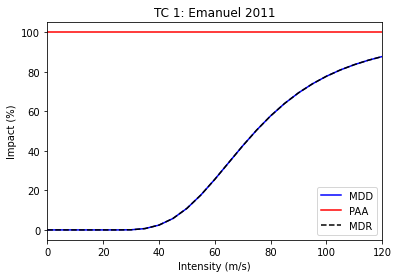

In [4]:
from climada.entity import ImpfTropCyclone

# Here we generate the impact function for TC damage using the formula of Emanuel 2011
impFunc_emanuel_usa = ImpfTropCyclone()
impFunc_emanuel_usa.set_emanuel_usa()
# plot the impact function
impFunc_emanuel_usa.plot()

<a id='Part3'></a>
## Part 3: Add `ImpactFunc` into the container `ImpactFuncSet`

`ImpactFuncSet` is a container of multiple `ImpactFunc`, it is part of the arguments in `impact.calc()` (see [the impact tutorial](climada_engine_Impact.ipynb)).

Here we generate 2 aribtrary impact funstions and add them into an `ImpactFuncSet` class. To add them into the container, simply use the method `ImpactFuncSet.append(ImpactFunc)`.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from climada.entity import ImpactFunc, ImpactFuncSet

# generate the 1st arbitrary impact function 
imp_fun_1 = ImpactFunc() 
imp_fun_1.haz_type = 'TC'
imp_fun_1.id = 1
imp_fun_1.name = 'TC Default Damage Function'
imp_fun_1.intensity_unit = 'm/s'
imp_fun_1.intensity = np.linspace(0, 100, num=10)
imp_fun_1.mdd = np.concatenate((np.array([0]),np.sort(np.random.rand(9))), axis=0)
imp_fun_1.paa = np.concatenate((np.array([0]),np.sort(np.random.rand(9))), axis=0)
imp_fun_1.check()

# generate the 2nd arbitrary impact function 
imp_fun_3 = ImpactFunc() 
imp_fun_3.haz_type = 'TC'
imp_fun_3.id = 3
imp_fun_3.name = 'TC Building Damage'
imp_fun_3.intensity_unit = 'm/s'
imp_fun_3.intensity = np.linspace(0, 100, num=15)
imp_fun_3.mdd = np.concatenate((np.array([0]),np.sort(np.random.rand(14))), axis=0)
imp_fun_3.paa = np.concatenate((np.array([0]),np.sort(np.random.rand(14))), axis=0)
imp_fun_1.check()

# add the 2 impact functions into ImpactFuncSet
imp_fun_set = ImpactFuncSet()
imp_fun_set.append(imp_fun_1)
imp_fun_set.append(imp_fun_3)

#### Plotting all the impact functions in an `ImpactFuncSet`

The method `plot()` in `ImpactFuncSet` also uses the the [matplotlib's axes plot function](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.axes.Axes.plot.html) to visualise the impact functions, returning a figure with all the subplots of impact functions. Users may modify these plots.

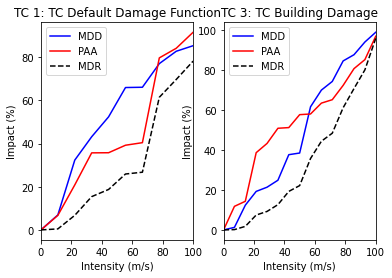

In [6]:
# plotting all the impact functions in impf_set
axes = imp_fun_set.plot()

#### Retrieving an impact function from the `ImpactFuncSet`
User may want to retrive a particular impact function from `ImpactFuncSet`. Using the method `get_func(haz_type, id)`, it returns an `ImpactFunc` class of the desired impact function. Below is an example of extracting the TC impact function with id 1, and using `plot()` to visualise the function.

<AxesSubplot:title={'center':'TC 1: TC Default Damage Function'}, xlabel='Intensity (m/s)', ylabel='Impact (%)'>

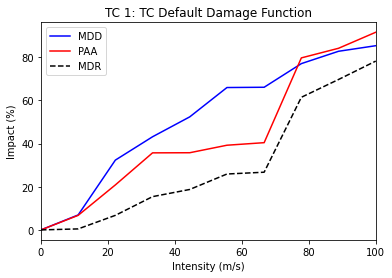

In [7]:
# extract the TC impact function with id 1
impf_tc_1 = imp_fun_set.get_func('TC', 1)
# plot the impact function
impf_tc_1.plot()

#### Removing an impact function from the ImpactFunctionSet

If there is an unwanted impact function from the `ImpactFuncSet`, we may remove it using the method `remove_func(haz_type, id)` to remove it from the set. 

For example, in the previous generated impact function set `imp_fun_set` contains an unwanted TC impact function with id 3, we might thus would like to remove that from the set.

array([<AxesSubplot:title={'center':'TC 1: TC Default Damage Function'}, xlabel='Intensity (m/s)', ylabel='Impact (%)'>,
       <AxesSubplot:title={'center':'TC 3: TC Building Damage'}, xlabel='Intensity (m/s)', ylabel='Impact (%)'>],
      dtype=object)

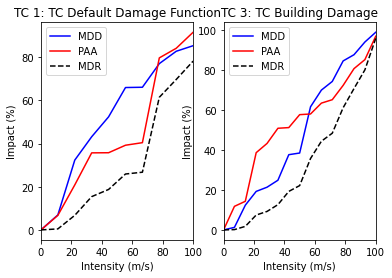

In [8]:
# first plotting all the impact functions in the impact function set to see what is in there:
imp_fun_set.plot()

<AxesSubplot:title={'center':'TC 1: TC Default Damage Function'}, xlabel='Intensity (m/s)', ylabel='Impact (%)'>

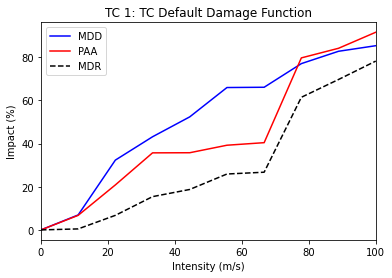

In [9]:
# removing the TC impact function with id 3
imp_fun_set.remove_func('TC', 3)
# plot all the remaining impact functions in imp_fun_set
imp_fun_set.plot()

<a id='Part4'></a>
## Part 4: Read and write `ImpactFuncSet` into Excel sheets

Users may load impact functions to an `ImpactFuncSet` class from an excel sheets, or to write the `ImpactFuncSet` into an exvel. This section will give an example of how to do it.

#### Reading impact functions from an Excel file

Impact functions defined in an excel file following the template provided in sheet `impact_functions` of `climada_python/data/system/entity_template.xlsx` can be ingested directly using the method `read_excel()`.

Read file: C:\Users\me\climada\data\entity_template.xlsx


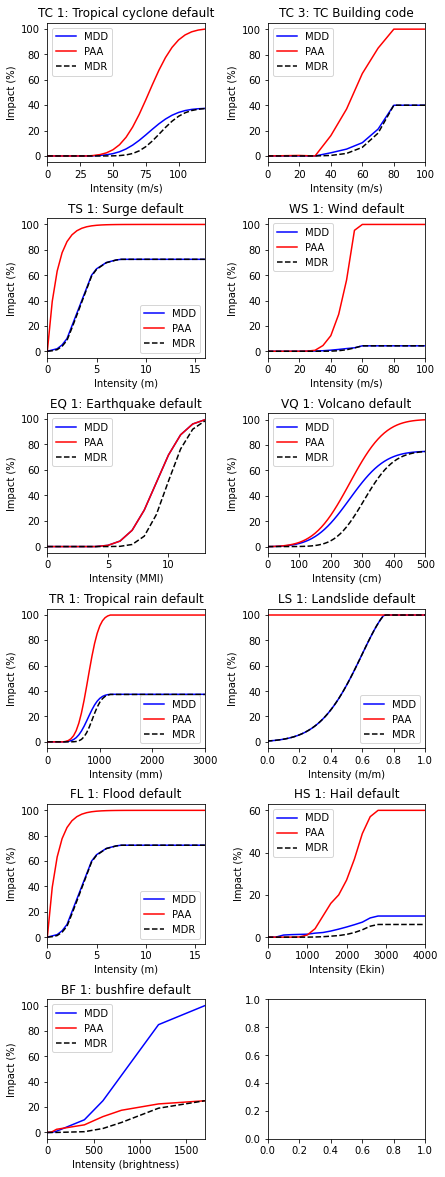

In [10]:
from climada.entity import ImpactFuncSet
from climada.util import ENT_TEMPLATE_XLS
import matplotlib.pyplot as plt

# provide absolute path of the input excel file
file_name = ENT_TEMPLATE_XLS 
# fill ImpactFuncSet from Excel file
imp_set_xlsx = ImpactFuncSet()
imp_set_xlsx.read_excel(file_name)

# plot all the impact functions from the ImpactFuncSet
print('Read file:', imp_set_xlsx.tag.file_name)
imp_set_xlsx.plot()
# adjust the plots
plt.tight_layout()
plt.subplots_adjust(right=1., top=4., hspace=0.4, wspace=0.4)

#### Write impact functions

Users may write the impact functions in Excel format using `write_excel()` method.

In [11]:
from climada.entity import ImpactFuncSet
from climada.util import ENT_TEMPLATE_XLS

# provide absolute path of the output excel file
file_name_save = ENT_TEMPLATE_XLS 

# write imp_set_xlsx into an excel file
imp_set_xlsx.write_excel('tutorial_impf_set.xlsx')

#### Alternative saveing format

Alternatively, users may also save the impact functions into [pickle format](https://docs.python.org/3/library/pickle.html), using CLIMADA in-built function `save()`.

In [12]:
from climada.util.save import save

# this generates a results folder in the current path and stores the output there
save('tutorial_impf_set.p', imp_set_xlsx)

2021-04-30 14:47:45,320 - climada.util.save - INFO - Written file ./results/tutorial_impf_set.p


<a id='Part5'></a>
## Part 5: Loading `ImpactFuncSet` from CLIMADA in-built impact functions

Similar to [Part 3](#Part3), some of the impact functions are available as `ImpactFuncSet` classes. Users may load them from the CLIMADA modules. 

Here we use the example of the calibrated impact functions of TC wind damages per region to property damages, following the reference [Eberenz et al. (2020)](https://doi.org/10.5194/nhess-2020-229). Method `set_calibrated_regional_ImpfSet()` returns a set of default calibrated impact functions for TC for different regions.

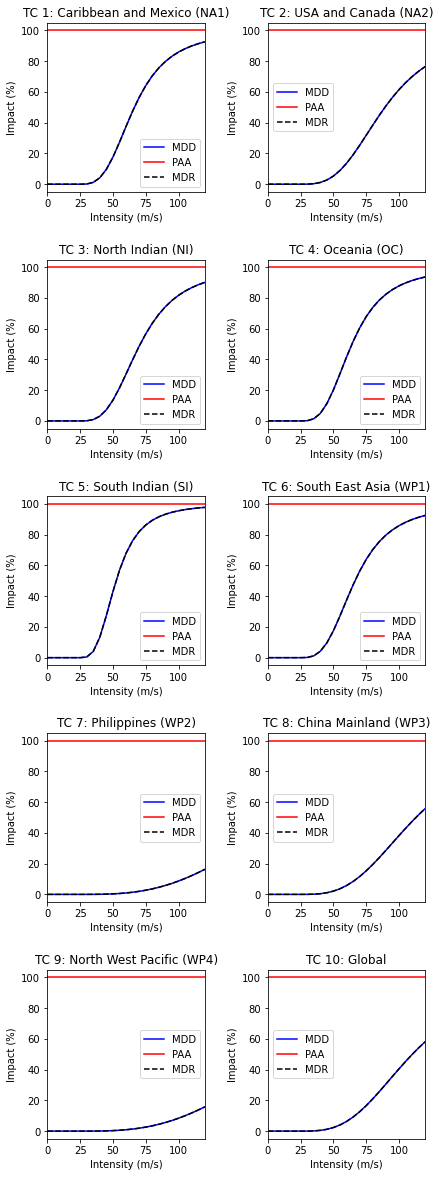

In [13]:
from climada.entity.impact_funcs.trop_cyclone import ImpfSetTropCyclone
import matplotlib.pyplot as plt

# generate the default calibrated TC impact functions for different regions
imp_fun_set_TC = ImpfSetTropCyclone()
imp_fun_set_TC.set_calibrated_regional_ImpfSet()

# plot all the impact functions
imp_fun_set_TC.plot()
# adjust the plots
plt.tight_layout()
plt.subplots_adjust(right=1., top=4., hspace=0.4, wspace=0.4)